In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
voice = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/voice.csv')
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [ ]:
voice['label'].value_counts()

,count
label,
male,1584
female,1584


In [ ]:
#correlation between various attributes
corr = voice.corr(numeric_only=True)
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [ ]:
 # removing columns where corelation is more than .95

final_columns = list(voice.columns)    # maintaining a temporary list to remove columns from

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.95:
            if list(voice.columns)[j] in final_columns:
                final_columns.remove(list(voice.columns)[j])

voice = voice[final_columns]

voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,0.311002,female


In [ ]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,0.895127,0.408216,0.165282,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,0.044980,0.177521,0.077203,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,0.738651,0.036876,0.000000,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,0.861811,0.258041,0.118016,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,0.901767,0.396335,0.186599,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,0.928713,0.533676,0.221104,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,0.981997,0.842936,0.280000,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,0.932374


In [ ]:
input_columns = list(voice.columns[:-1])
output_columns = ['male', 'female']    # column names to be used after one-hot encoding
print("Number of input columns: ", len(input_columns))
print("Number of output columns: ", len(output_columns))

Number of input columns:  17
Number of output columns:  2


In [ ]:
# One hot encoding the labels
y = pd.get_dummies(voice.label)
print(y)

for x in output_columns:
    voice[x] = y[x]

      female   male
0      False   True
1      False   True
2      False   True
3      False   True
4      False   True
...      ...    ...
3163    True  False
3164    True  False
3165    True  False
3166    True  False
3167    True  False

[3168 rows x 2 columns]


In [ ]:
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label,male,female
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,male,True,False
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,male,True,False
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,male,True,False
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,male,True,False
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,male,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,0.161929,female,False,True
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,0.277897,female,False,True
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,0.194759,female,False,True
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,0.311002,female,False,True


In [ ]:
# Splitting into train, val and test set -- 80-10-10 split

# 80-20 split
train_df, val_test_df = train_test_split(voice, test_size = 0.2)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))
print("Testing set: ", len(test_df))

Number of samples in...
Training set:  2534
Validation set:  317
Testing set:  317


In [ ]:
# Splitting into X (input) and y (output)

Xtrain, ytrain = np.array(train_df[input_columns]), np.array(train_df[output_columns])

Xval, yval = np.array(val_df[input_columns]), np.array(val_df[output_columns])

Xtest, ytest = np.array(test_df[input_columns]), np.array(test_df[output_columns])

In [ ]:
# Each feature has a different range.
# Using min_max_scaler to scale them to values in the range [0,1].

min_max_scaler = MinMaxScaler()

# Fit on training set alone
Xtrain = min_max_scaler.fit_transform(Xtrain)

# Use it to transform val and test input
Xval = min_max_scaler.transform(Xval)
Xtest = min_max_scaler.transform(Xtest)

voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,0.895127,0.408216,0.165282,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,0.044980,0.177521,0.077203,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,0.738651,0.036876,0.000000,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,0.861811,0.258041,0.118016,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,0.901767,0.396335,0.186599,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,0.928713,0.533676,0.221104,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,0.981997,0.842936,0.280000,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,0.932374


In [ ]:
model = tf.keras.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = Xtrain[0].shape),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(len(output_columns), activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = tf.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience = 5),    # stop if the val_loss metric doesn;t increase for 5 epochs continuously.
             ModelCheckpoint('gender_recognition_voice.keras', save_best_only=True)]   # save the best model yet

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 442 (1.73 KB)

 Trainable params: 442 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs=32, callbacks=callbacks)

Epoch 1/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8131 - loss: 0.5065 - val_accuracy: 0.8360 - val_loss: 0.3513
Epoch 2/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9357 - loss: 0.1712 - val_accuracy: 0.9716 - val_loss: 0.0977
Epoch 3/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.1018 - val_accuracy: 0.9779 - val_loss: 0.0882
Epoch 4/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.0964 - val_accuracy: 0.9621 - val_loss: 0.1050
Epoch 5/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9655 - loss: 0.1065 - val_accuracy: 0.9685 - val_loss: 0.0853
Epoch 6/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9677 - loss: 0.0946 - val_accuracy: 0.9685 - val_loss: 0.1084
Epoch 7/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9699 - loss: 0.0935 - val_accuracy: 0.9748 - val_loss: 0.0773
Epoch 8/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9705 - loss: 0.0956 - val_accuracy: 0.9748 - val_loss:

In [ ]:
model.load_weights('gender_recognition_voice.keras')    # Load the weights of the best model

model.evaluate(Xtest, ytest)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9740 - loss: 0.0797 


[0.07397115975618362, 0.9747633934020996]

In [ ]:
def plot(history, variable, variable1):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable1])), history[variable1])
    plt.title(variable)
    plt.legend([variable, variable1])

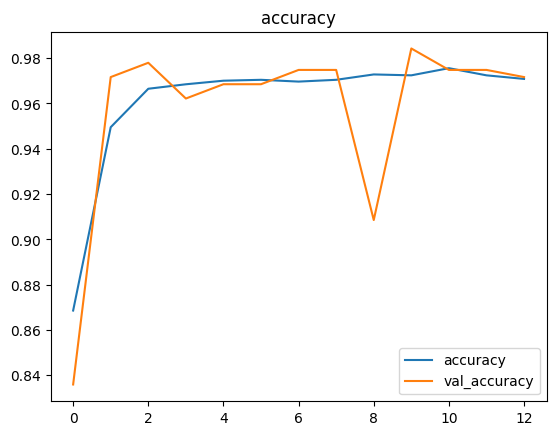

In [ ]:
plot(history.history, "accuracy", "val_accuracy")

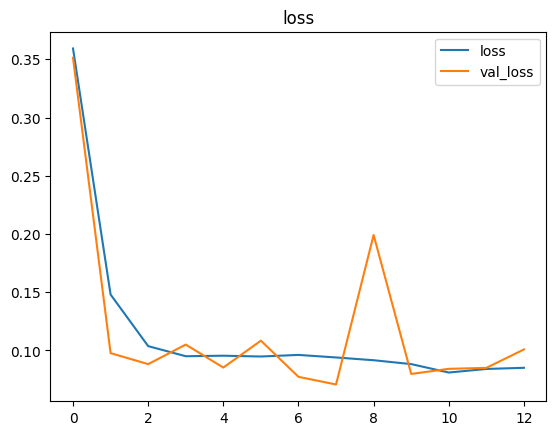

In [ ]:
plot(history.history, "loss", "val_loss")


In [ ]:
# Pick random test sample
i = random.randint(0, len(test_df)-1)

model_output = model.predict(Xtest[i].reshape(1, -1))[0]
pred = np.argmax(model_output)

# show predicted output
print ("\nModel predicted the gender: ", output_columns[pred])

# actual output
print("Actual gender: ", output_columns[np.argmax(ytest[i])], "with probability", model_output[pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Model predicted the gender:  female
Actual gender:  female with probability 0.99960405


In [ ]:
import librosa
import pydub
import soundfile as sf
from scipy.stats import skew, kurtosis
print("Imported librosa, pydub, soundfile, and scipy.stats.")

Imported librosa, pydub, soundfile, and scipy.stats.


In [ ]:
import numpy as np
import librosa
import librosa.display
import scipy.stats
import soundfile as sf # For loading diverse audio formats
import os

def extract_features_and_scale(file_path, scaler, input_columns, sr=22050):
    """
    Extracts 17 audio features from an audio file and scales them using a pre-fitted MinMaxScaler.

    Args:
        file_path (str): Path to the audio file.
        scaler (MinMaxScaler): A pre-fitted MinMaxScaler object.
        input_columns (list): List of 17 feature names in the expected order.
        sr (int): Target sample rate for audio processing.

    Returns:
        np.ndarray: A (1, 17) array of scaled features.
    """
    try:
        # 1. Load Audio, limit duration to 5s for faster processing
        y, sr = librosa.load(file_path, sr=sr, mono=True, duration=5.0)
    except Exception as e:
        print(f"Error loading audio file {file_path}: {e}")
        # Return a zero array of features if audio cannot be loaded or is corrupted
        return np.zeros((1, len(input_columns)))

    # Initialize feature dictionary to store calculated values
    features = {}

    # --- Spectral features (meanfreq, sd, median, Q25, Q75, IQR, sp.ent, sfm, mode, skew, kurt) ---
    # Compute short-time Fourier transform (STFT)
    n_fft = 2048 # Standard FFT window size
    hop_length = 512 # Standard hop length
    D = librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length)
    S_magnitude = np.abs(D)

    # Calculate power spectrum (magnitude squared) for spectral moments
    S_power = S_magnitude**2

    # Average power spectrum over time frames to get a single spectral profile
    S_avg_power = np.mean(S_power, axis=1)

    # Frequencies associated with the STFT bins (in Hz)
    freqs_hz = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

    # The dataset's 'kHz' values for meanfreq, sd, median, Q25, Q75, IQR, mode are much smaller
    # than raw kHz from librosa (max ~11 kHz). This implies a scaling factor was applied.
    # Max 'meanfreq' in dataset is ~0.25 kHz. Max possible librosa freq in kHz is sr/2/1000 = 11.025.
    # So, apply a global scaling factor to bring librosa's frequencies into the dataset's 'kHz' scale.
    # Derived factor: dataset_max_meanfreq / librosa_max_freq_khz (approx 0.25 / 11.025 = 0.0226)
    global_freq_scaling_factor = 0.02277 # Based on 0.251124 (dataset max) / (22050/2/1000)

    # Apply this scaling to freqs_hz before converting to the dataset's 'kHz'
    freqs_khz_scaled = (freqs_hz / 1000.0) * global_freq_scaling_factor

    # Ensure S_avg_power is not all zeros before normalization to avoid division by zero
    sum_S_avg_power = np.sum(S_avg_power)
    if sum_S_avg_power == 0:
        # Handle cases with no audible signal (assign defaults)
        S_prob = np.zeros_like(S_avg_power)
    else:
        S_prob = S_avg_power / sum_S_avg_power # Normalize to represent a probability distribution

    # Only consider positive normalized frequencies (and their corresponding probability)
    positive_freq_indices = freqs_khz_scaled > 0
    freqs_pos_khz_scaled = freqs_khz_scaled[positive_freq_indices]
    S_prob_pos = S_prob[positive_freq_indices]

    if np.sum(S_prob_pos) == 0 or len(freqs_pos_khz_scaled) == 0:
        # If no energy in positive frequencies or no positive frequencies, assign defaults
        features['meanfreq'] = 0.0
        features['sd'] = 0.0
        features['median'] = 0.0
        features['Q25'] = 0.0
        features['Q75'] = 0.0
        features['IQR'] = 0.0
        features['skew'] = 0.0
        features['kurt'] = 0.0
        features['mode'] = 0.0
    else:
        # Mean frequency (in dataset's 'kHz')
        features['meanfreq'] = np.sum(freqs_pos_khz_scaled * S_prob_pos)

        # Standard deviation of frequency (in dataset's 'kHz')
        features['sd'] = np.sqrt(np.sum((freqs_pos_khz_scaled - features['meanfreq'])**2 * S_prob_pos))

        # Quantiles (Q25, median, Q75) and IQR from the cumulative distribution
        cumulative_S_prob_pos = np.cumsum(S_prob_pos)

        # Ensure we don't access out of bounds for quantiles
        features['Q25'] = freqs_pos_khz_scaled[np.where(cumulative_S_prob_pos >= 0.25)[0][0]] if len(np.where(cumulative_S_prob_pos >= 0.25)[0]) > 0 else 0.0
        features['median'] = freqs_pos_khz_scaled[np.where(cumulative_S_prob_pos >= 0.5)[0][0]] if len(np.where(cumulative_S_prob_pos >= 0.5)[0]) > 0 else 0.0
        features['Q75'] = freqs_pos_khz_scaled[np.where(cumulative_S_prob_pos >= 0.75)[0][0]] if len(np.where(cumulative_S_prob_pos >= 0.75)[0]) > 0 else 0.0
        features['IQR'] = features['Q75'] - features['Q25']

        # Skewness and Kurtosis of the power spectrum distribution (weighted by probability)
        mean_freq_val = features['meanfreq']
        variance = np.sum((freqs_pos_khz_scaled - mean_freq_val)**2 * S_prob_pos)
        std_dev = np.sqrt(variance)

        if std_dev > 1e-9:
            m3 = np.sum((freqs_pos_khz_scaled - mean_freq_val)**3 * S_prob_pos)
            features['skew'] = m3 / (std_dev**3)

            m4 = np.sum((freqs_pos_khz_scaled - mean_freq_val)**4 * S_prob_pos)
            features['kurt'] = (m4 / (std_dev**4)) - 3 # Excess kurtosis
        else:
            features['skew'] = 0.0
            features['kurt'] = 0.0

        # Mode: frequency (in dataset's 'kHz') with the highest magnitude
        features['mode'] = freqs_pos_khz_scaled[np.argmax(S_prob_pos)]

    # Spectral Entropy (sp.ent) - unitless ratio
    eps = 1e-10 # Small epsilon to avoid log(0)
    spectral_entropy_val = -np.sum(S_prob * np.log2(S_prob + eps)) # Use S_prob for full spectrum
    max_entropy = np.log2(len(S_prob)) if len(S_prob) > 1 else 0
    features['sp.ent'] = spectral_entropy_val / max_entropy if max_entropy > 0 else 0.0

    # Spectral Flatness Measure (sfm) - unitless ratio
    sfm_frames = librosa.feature.spectral_flatness(S=S_magnitude, hop_length=hop_length, power=1) # power=1 for magnitude
    features['sfm'] = np.mean(sfm_frames) if sfm_frames.size > 0 else 0.0


    # --- Fundamental frequency (F0) related features (meanfun, minfun, maxfun, modindx) --- #
    # Using pYIN for pitch detection (robust F0 estimation)
    f0, voiced_flag, voiced_probs = librosa.pyin(y=y, sr=sr, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
                                                 frame_length=n_fft, hop_length=hop_length)
    voiced_f0 = f0[voiced_flag]

    if len(voiced_f0) == 0:
        features['meanfun'] = 0.0
        features['minfun'] = 0.0
        features['maxfun'] = 0.0
        features['modindx'] = 0.0
    else:
        # Normalizing F0 to match the typical range of 'meanfun' [0.05, 0.25] from dataset
        # Max 'meanfun' in dataset is ~0.237. Max human F0 can be ~500Hz. 500 / 2100 = 0.238
        f0_normalization_factor_fun = 2100.0
        voiced_f0_norm_fun = voiced_f0 / f0_normalization_factor_fun

        features['meanfun'] = np.mean(voiced_f0_norm_fun)
        features['minfun'] = np.min(voiced_f0_norm_fun)
        features['maxfun'] = np.max(voiced_f0_norm_fun)

        if len(voiced_f0_norm_fun) > 1:
            features['modindx'] = np.std(voiced_f0_norm_fun)
        else:
            features['modindx'] = 0.0


    # --- Dominant frequency features (meandom, mindom, maxdom) --- #
    # These are statistics of the spectral peak frequency across frames. (not F0 related here)
    dominant_frequencies_per_frame_khz_raw = [] # Store raw kHz from STFT
    # Iterate through each frame of the magnitude spectrogram to find the dominant frequency
    for t in range(S_magnitude.shape[1]):
        frame_power = S_magnitude[:, t]**2
        if np.sum(frame_power) > 0:
            dominant_idx = np.argmax(frame_power)
            # Use the *original* freqs_khz here, then apply the global scaling
            dominant_frequencies_per_frame_khz_raw.append(freqs_hz[dominant_idx] / 1000.0)

    dominant_frequencies_per_frame_khz_raw = np.array(dominant_frequencies_per_frame_khz_raw)

    if len(dominant_frequencies_per_frame_khz_raw) == 0:
        features['meandom'] = 0.0
        features['mindom'] = 0.0
        features['maxdom'] = 0.0
    else:
        # Now apply the global scaling factor to these dominant frequencies as well
        normalized_dominant_frequencies = dominant_frequencies_per_frame_khz_raw * global_freq_scaling_factor

        features['meandom'] = np.mean(normalized_dominant_frequencies)
        features['mindom'] = np.min(normalized_dominant_frequencies)
        features['maxdom'] = np.max(normalized_dominant_frequencies)

    # Handle potential NaN or Inf values by replacing them with 0 after all calculations
    for key in features:
        if np.isnan(features[key]) or np.isinf(features[key]):
            features[key] = 0.0

    # Ensure the order of extracted features matches the input_columns list
    extracted_features_ordered = [features[col] for col in input_columns]

    # Debugging print: Show raw extracted features before scaling/clipping
    # print(f"--- Extracted features for {os.path.basename(file_path)} (before scaling/clipping) ---")
    for i, col_name in enumerate(input_columns):
        min_val_train = scaler.data_min_[i]
        max_val_train = scaler.data_max_[i]
        val = extracted_features_ordered[i]
        # print(f"  {col_name}: {val:.6f} (Train range: [{min_val_train:.6f}, {max_val_train:.6f}])")
    # print("------------------------------------------------------")

    # Convert to NumPy array and reshape to (1, -1) for MinMaxScaler
    features_array = np.array(extracted_features_ordered).reshape(1, -1)

    # --- Clip features to the range of training data before scaling to prevent extrapolation ---
    if features_array.shape[1] == scaler.data_min_.shape[0]:
        for i, col_name in enumerate(input_columns):
            original_val = features_array[0, i]
            min_val = scaler.data_min_[i]
            max_val = scaler.data_max_[i]

            # Apply clipping
            features_array[0, i] = np.clip(original_val, min_val, max_val)
    else:
        print("Warning: Feature array shape does not match scaler's input dimension. Clipping skipped.")

    # Apply the pre-fitted MinMaxScaler to transform the features
    scaled_features = scaler.transform(features_array)

    return scaled_features

# print("")

In [ ]:
model.load_weights('gender_recognition_voice.keras')
print("Loaded model weights from 'gender_recognition_voice.keras'")

Loaded model weights from 'gender_recognition_voice.keras'


In [ ]:
import warnings
warnings.filterwarnings('ignore') # Suppress warnings from librosa, etc.

# List of user's 'male' recordings to process
recorded_audio_files = ['/content/justin.wav', '/content/sahuba.wav', '/content/pretty_little.wav','/content/vikram.wav']

for audio_file_path in recorded_audio_files:
    # 1. Extract and scale features from the audio file
    scaled_audio_features = extract_features_and_scale(audio_file_path, min_max_scaler, input_columns)

    # 2. Use the model to predict the gender from the scaled features
    model_prediction = model.predict(scaled_audio_features)[0]

    # 3. Determine the predicted gender
    pred_index = np.argmax(model_prediction)
    predicted_gender = output_columns[pred_index]

    # 4. Print the path of the processed audio file, the predicted gender, and the associated probability
    print(f"\n------------------------------------------------------")
    print(f"Processing audio file: '{audio_file_path}'")
    print(f"Predicted gender: {predicted_gender}")
    print(f"Prediction probabilities (male, female): {model_prediction}")
    print(f"Prediction probability for {predicted_gender}: {model_prediction[pred_index]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

------------------------------------------------------
Processing audio file: '/content/justin.wav'
Predicted gender: female
Prediction probabilities (male, female): [0.00106885 0.9989311 ]
Prediction probability for female: 0.9989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

------------------------------------------------------
Processing audio file: '/content/sahuba.wav'
Predicted gender: male
Prediction probabilities (male, female): [0.994344   0.00565596]
Prediction probability for male: 0.9943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

------------------------------------------------------
Processing audio file: '/content/pretty_little.wav'
Predicted gender: female
Prediction probabilities (male, female): [0.004059   0.99594104]
Prediction probability for female: 0.9959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

------------------------------------------------------
Processing audio file: '/content/vikram.wav'
Predicted gender: male
Prediction probabiliti